In [1]:
#Import Library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   # its advance data visualization library
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load Dataset

In [2]:
df=pd.read_csv("milknew[1].csv")

# Basic EDA

In [3]:
df.head()  #Print First 5 row of dataset

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [4]:
df.tail()   #Print last 5 row of dataset

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high
1058,8.6,55,0,1,1,1,255,low


In [5]:
df.shape # Which presents colums and row of the dataset

(1059, 8)

In [6]:
df.info() #actually prints the info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [7]:
df.describe()   #basic statistic 

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


# Data Cleaning

In [8]:
df.duplicated().sum()

976

In [9]:
df.drop_duplicates()   #we can remove the duplicate values using drop

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
930,6.6,38,0,1,1,1,255,high
942,6.6,45,1,0,0,1,255,medium
957,6.8,41,1,1,1,0,255,high
985,6.5,45,1,0,0,0,246,medium


In [10]:
df.isnull().sum()  # checking for null values which are present in dataset

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [11]:
df.nunique()

pH            16
Temprature    17
Taste          2
Odor           2
Fat            2
Turbidity      2
Colour         9
Grade          3
dtype: int64

# Value Counts Of Different Colums

In [12]:
df['Grade'].value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

In [13]:
df['pH'].value_counts()

6.8    249
6.5    189
6.6    159
6.7     82
3.0     70
9.0     61
8.6     40
7.4     39
4.5     37
9.5     24
8.1     24
5.5     23
8.5     22
4.7     20
5.6     19
6.4      1
Name: pH, dtype: int64

In [14]:
df['Taste'].value_counts()

1    579
0    480
Name: Taste, dtype: int64

In [15]:
df['Grade'].value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

In [16]:
df['Temprature'].value_counts()

45    219
38    179
40    132
37     83
43     77
36     66
50     58
55     48
34     40
41     30
66     24
35     23
70     22
65     22
60     18
90     17
42      1
Name: Temprature, dtype: int64

In [17]:
df.corr()  #correlation of columns between each other

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565
Temprature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000


# Data Visualization

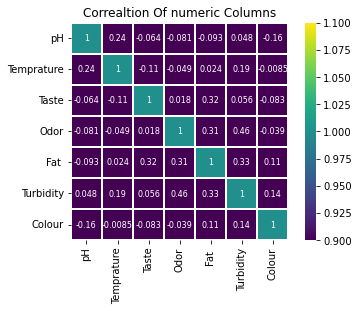

In [18]:
heatmap=sns.heatmap(
    df.corr(),
    annot=True,
    cmap="viridis",
    vmax=1.0,
    vmin=1.0,
    linewidths=0.1,
    annot_kws={"size": 8},
    square=True
)
heatmap.set_title("Correaltion Of numeric Columns")
plt.show()

# Grade Distribution

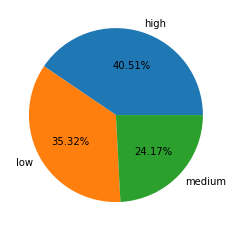

In [19]:
plt.pie(df['Grade'].value_counts(),autopct='%1.2f%%',labels=np.unique(df['Grade']))
plt.show()

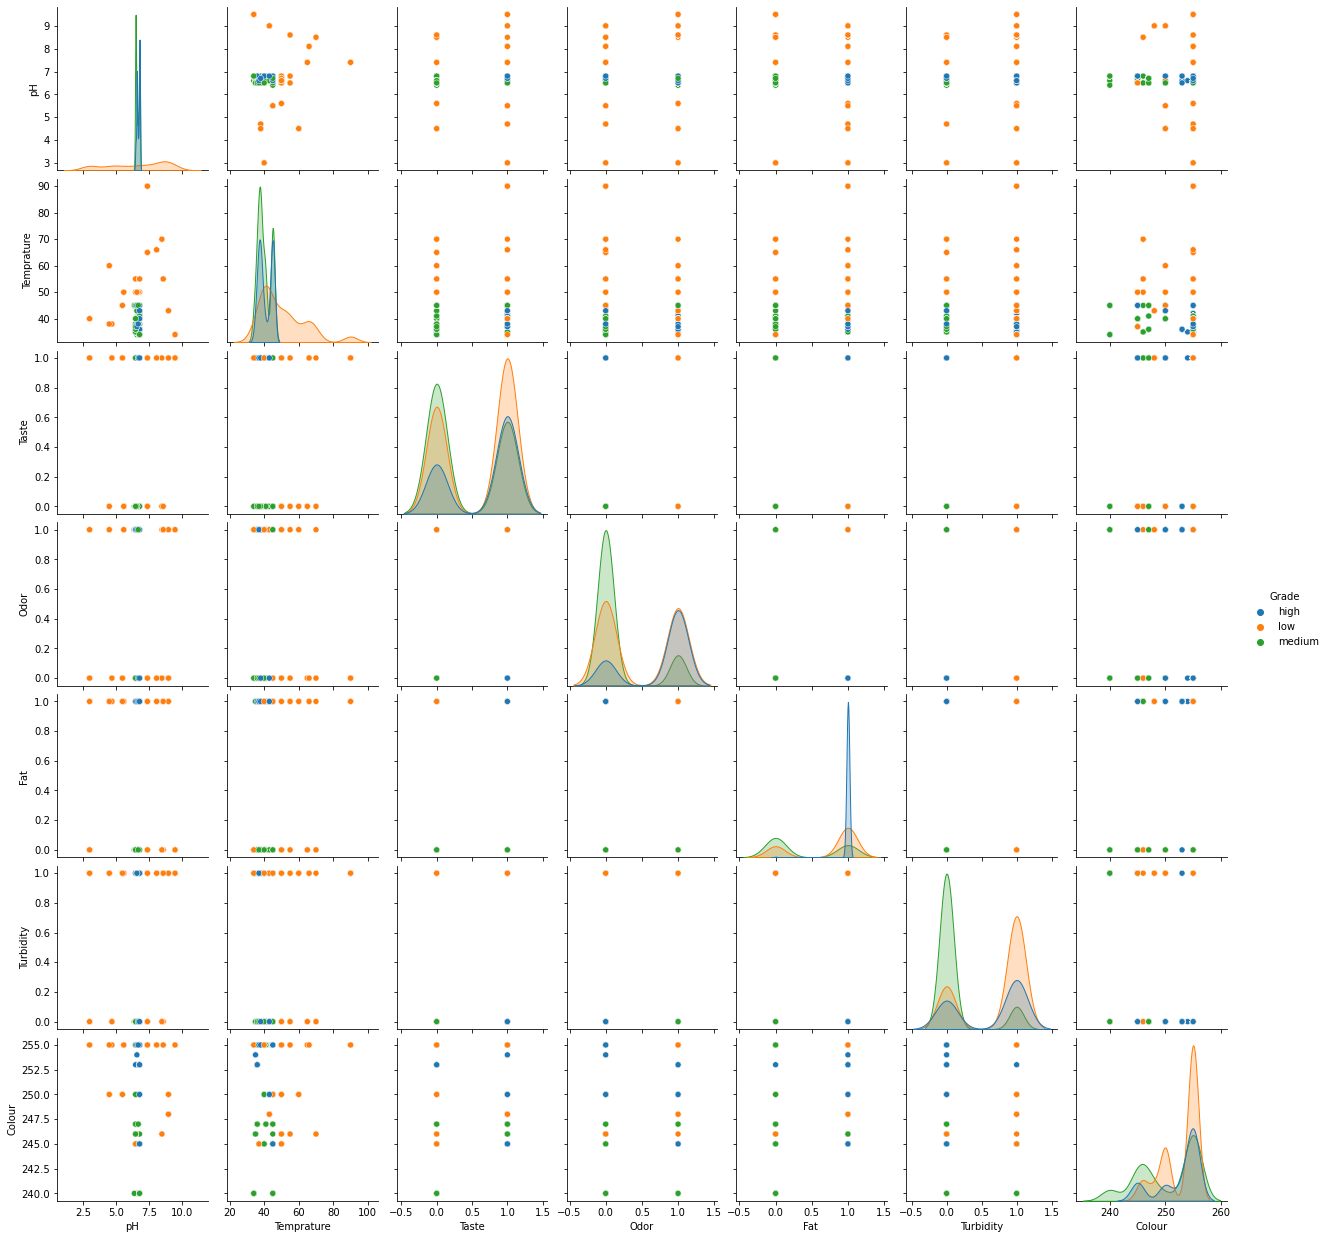

In [20]:
sns.pairplot(df,hue='Grade')

<AxesSubplot:xlabel='Grade', ylabel='Colour'>

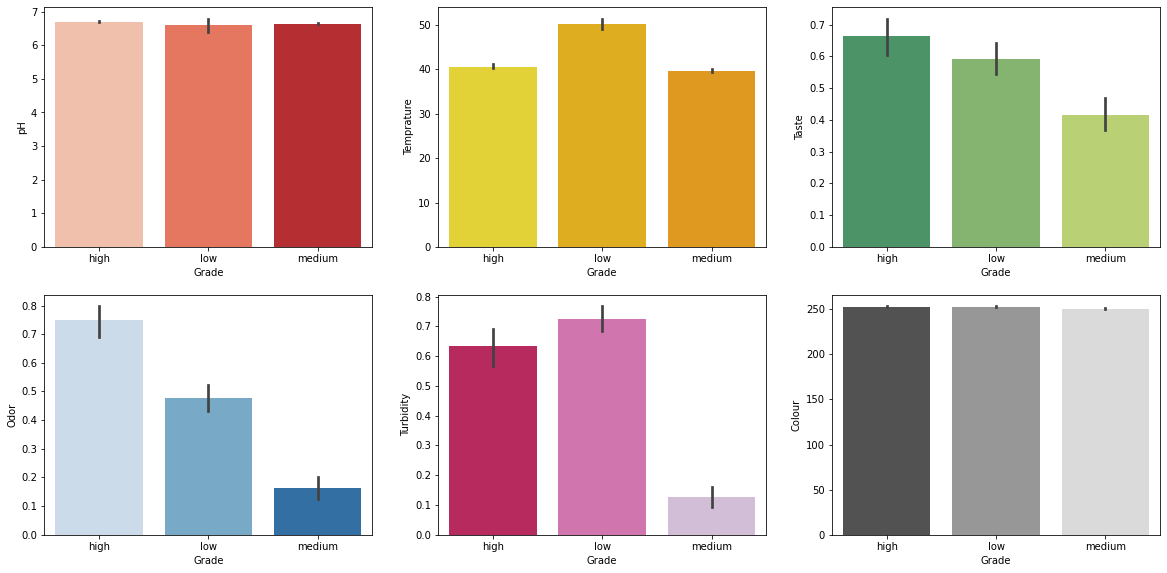

In [21]:
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.barplot(x='Grade',y='pH',data=df,palette="Reds")

plt.subplot(3,3,2)
sns.barplot(x='Grade',y='Temprature',data=df,palette="Wistia")

plt.subplot(3,3,3)
sns.barplot(x='Grade',y='Taste',data=df,palette="summer")

plt.subplot(3,3,4)
sns.barplot(x='Grade',y='Odor',data=df,palette="Blues")

plt.subplot(3,3,5)
sns.barplot(x='Grade',y='Turbidity',data=df,palette="PuRd_r")

plt.subplot(3,3,6)
sns.barplot(x='Grade',y='Colour',data=df,palette="Greys_r")

# Odor v/s Grade using boxplot

Text(0.5, 1.0, 'Temprature')

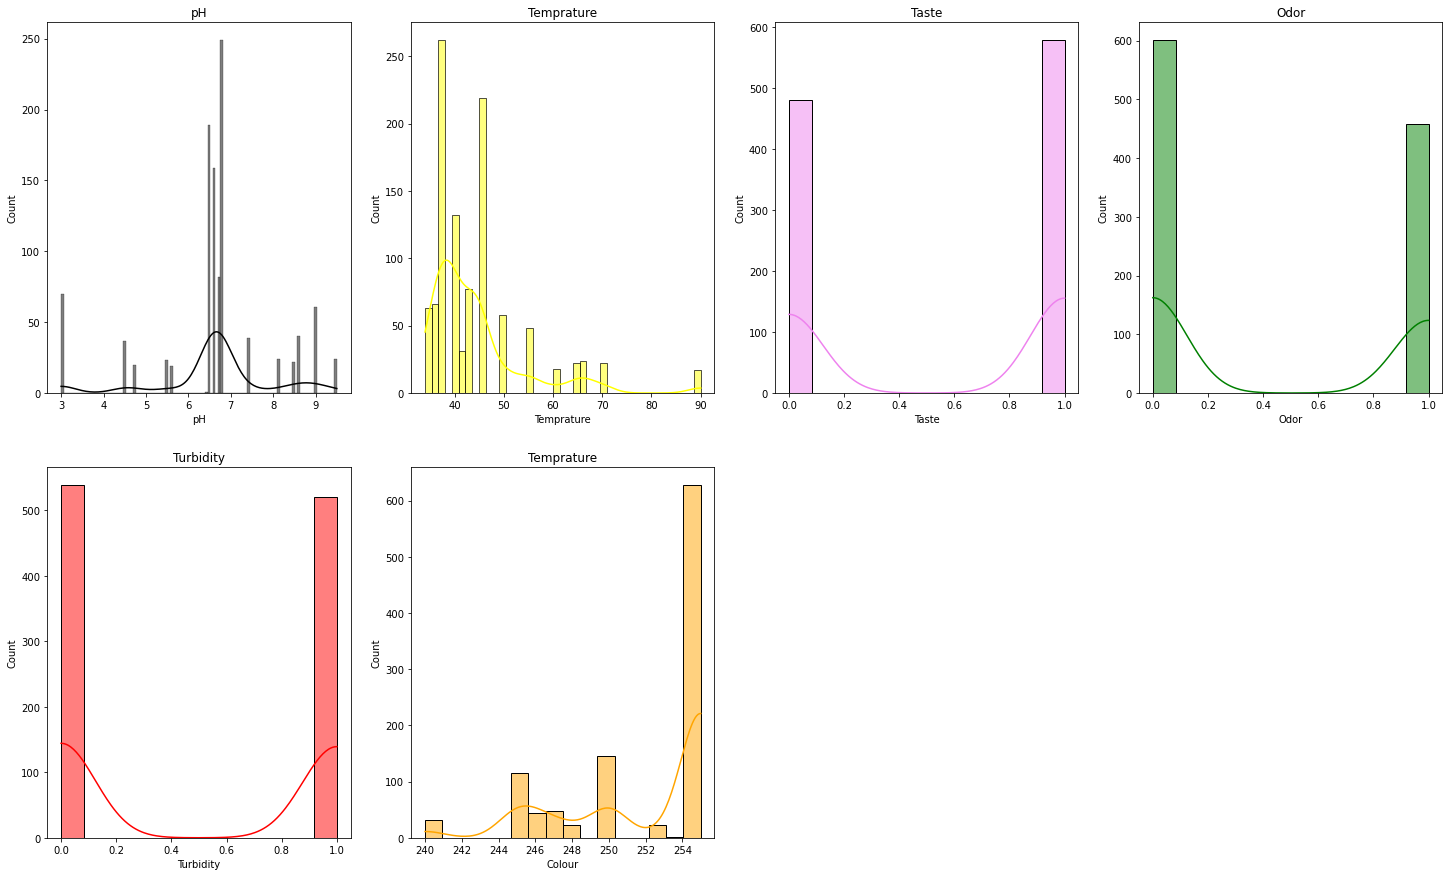

In [22]:
plt.figure(figsize=(25,15))

plt.subplot(2,4,1)
sns.histplot(df['pH'],color='black',kde=True).set_title('pH')

plt.subplot(2,4,2)
sns.histplot(df['Temprature'],color='yellow',kde=True).set_title('Temprature')

plt.subplot(2,4,3)
sns.histplot(df['Taste'],color='violet',kde=True).set_title('Taste')

plt.subplot(2,4,4)
sns.histplot(df['Odor'],color='green',kde=True).set_title('Odor')

plt.subplot(2,4,5)
sns.histplot(df['Turbidity'],color='red',kde=True).set_title('Turbidity')

plt.subplot(2,4,6)
sns.histplot(df['Colour'],color='orange',kde=True).set_title('Temprature')


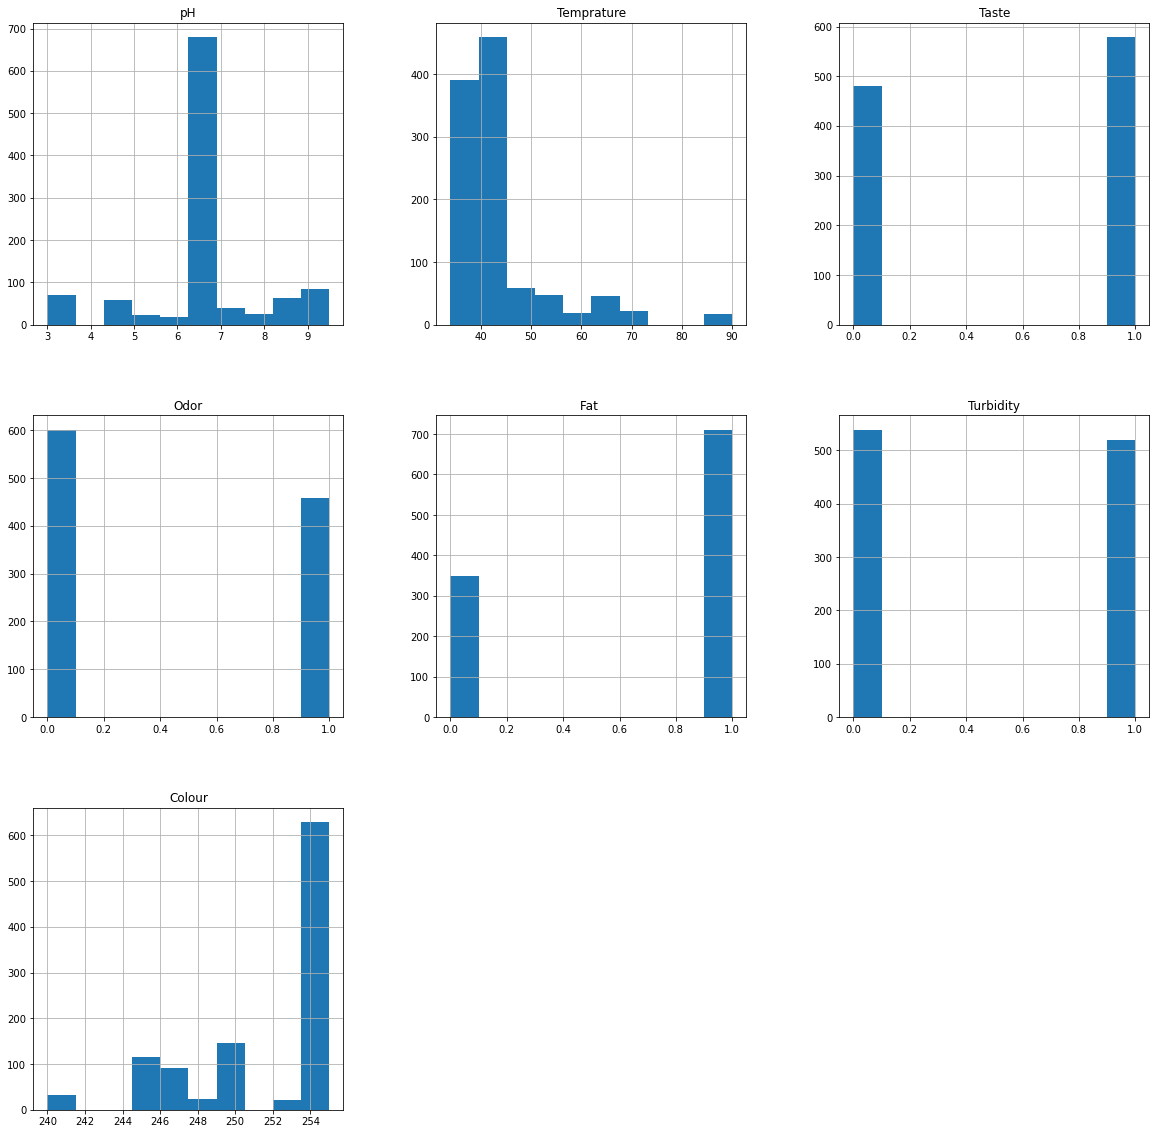

In [23]:
df.hist(figsize=(20,20))
plt.show()

<AxesSubplot:xlabel='Grade', ylabel='Colour'>

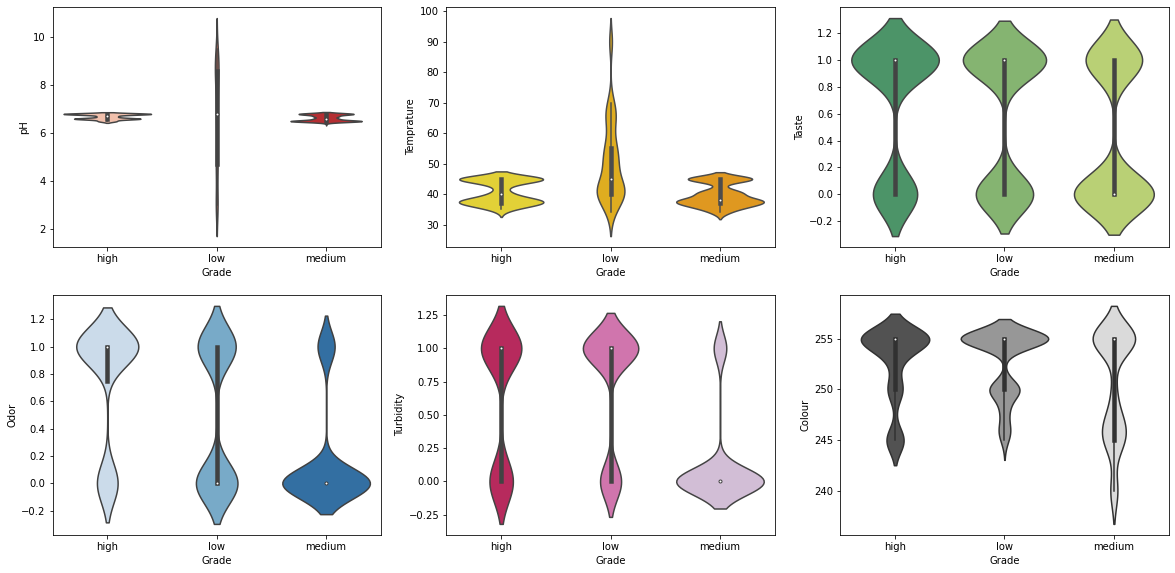

In [24]:
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.violinplot(x='Grade',y='pH',data=df,palette="Reds")

plt.subplot(3,3,2)
sns.violinplot(x='Grade',y='Temprature',data=df,palette="Wistia")

plt.subplot(3,3,3)
sns.violinplot(x='Grade',y='Taste',data=df,palette="summer")

plt.subplot(3,3,4)
sns.violinplot(x='Grade',y='Odor',data=df,palette="Blues")

plt.subplot(3,3,5)
sns.violinplot(x='Grade',y='Turbidity',data=df,palette="PuRd_r")

plt.subplot(3,3,6)
sns.violinplot(x='Grade',y='Colour',data=df,palette="Greys_r")